# Similarity measures for the atomic representations

This notebook provides the code used to plot the distance/correlation plots for the chemical representations featured in our publication

TODO: Create a plotting module to handle building subplots of multiple AtomicEmbedding outputs

In [1]:
import matplotlib.pyplot as plt
from AtomicEmbeddings import Atomic_Embeddings
import smact
import seaborn as sns
import numpy as np
from sklearn import decomposition

## Pre-processing


In [2]:
# Set up the Atomic Embedding features

# Create a list of the CBFVs we are interested in
cbfvs = ['mat2vec', 'random_200', 'magpie_sc','megnet16']

# Create a dictionary of {cbfv: AtomicEmbeddings}
AtomEmbeds = {cbfv: Atomic_Embeddings.from_json(cbfv) for cbfv in cbfvs}


In [3]:
len(AtomEmbeds['random_200'].element_list)

82

In [4]:
# Only keep the first 83 elements for the Atomic Embeddings

#For now Smact is used, but a future update will aim to remove this dependency
el_symbols = smact.ordered_elements(1,83)


In [5]:
# Iterate over the AtomEmbeds to remove the elements

for cbfv in cbfvs:

    # Get the keys of the atomic embeddings object
    elements=set(AtomEmbeds[cbfv].element_list)
    el_symbols_set=set(el_symbols)

    # Get the element symbols we want to remove
    els_to_remove = list(elements - el_symbols_set)

    # Iteratively delete the elements with atomic number greater than 83 from our embeddings
    for el in els_to_remove:
        del AtomEmbeds[cbfv].embeddings[el]

    # Verify that we have 83 elements
    print(len(AtomEmbeds[cbfv].element_list))





83
80
83
83


## Distance and correlation plots for the high-dimensional representations

/Users/aonwu/Documents/Project 2/Atomic_Embeddings/AtomicEmbeddings/AtomicEmbeddings.py:110: RuntimeWarning: divide by zero encountered in double_scalars
  recip_dist= dist**-1
/Users/aonwu/Documents/Project 2/Atomic_Embeddings/AtomicEmbeddings/AtomicEmbeddings.py:110: RuntimeWarning: divide by zero encountered in double_scalars
  recip_dist= dist**-1
/Users/aonwu/Documents/Project 2/Atomic_Embeddings/AtomicEmbeddings/AtomicEmbeddings.py:110: RuntimeWarning: divide by zero encountered in double_scalars
  recip_dist= dist**-1
/Users/aonwu/Documents/Project 2/Atomic_Embeddings/AtomicEmbeddings/AtomicEmbeddings.py:110: RuntimeWarning: divide by zero encountered in double_scalars
  recip_dist= dist**-1


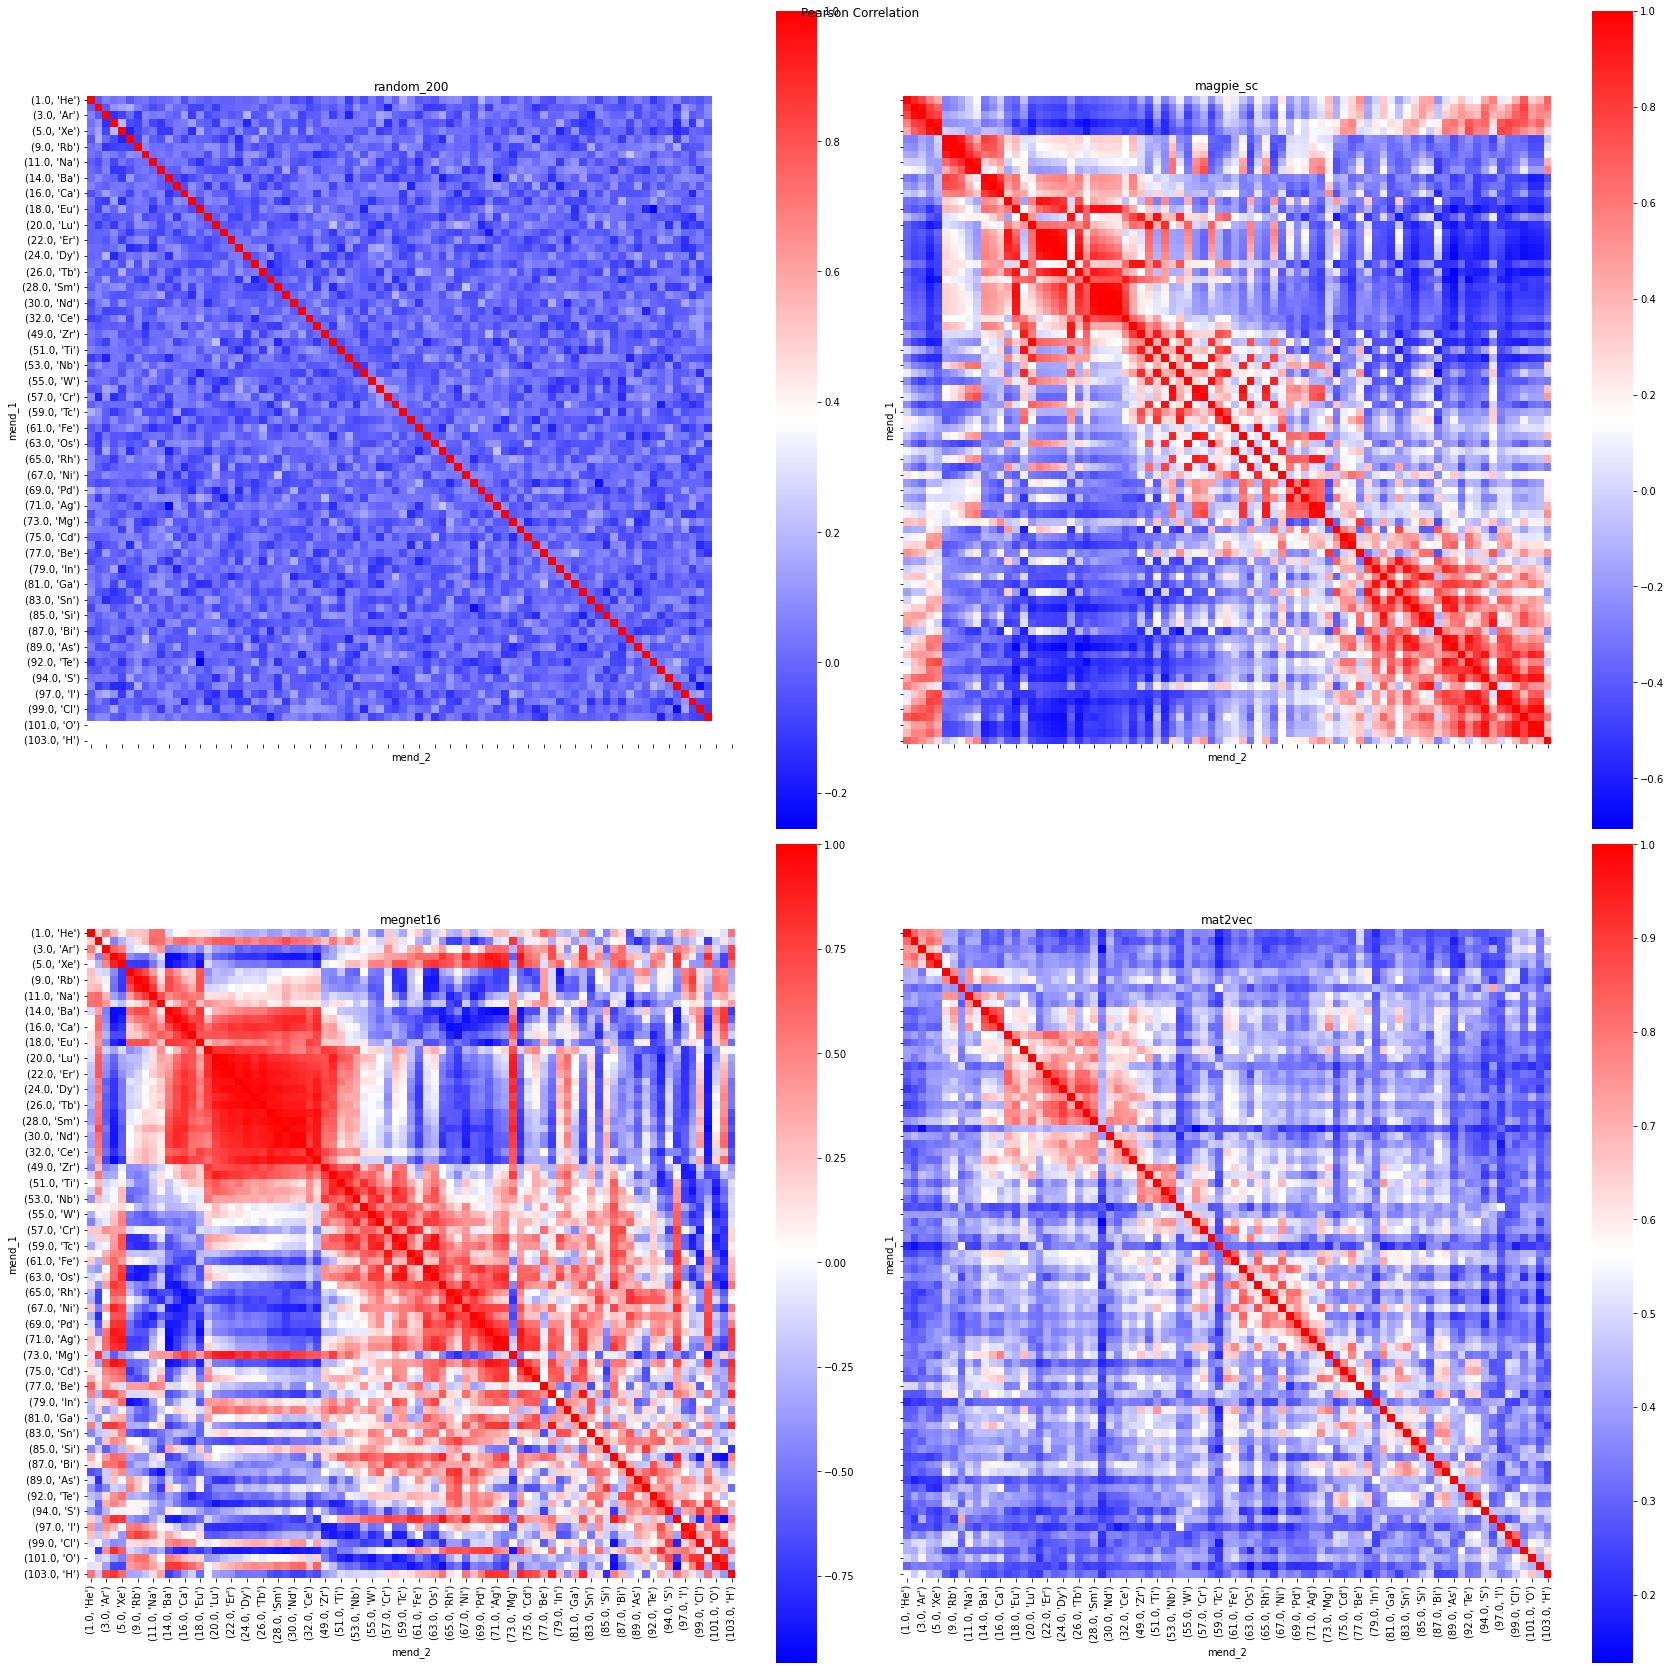

In [7]:
# Let's start generating the plots

# Plotting pearson correlations

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharex='col', sharey='row', figsize=(24,24))
axes =[ax1,ax2,ax3,ax4]
fig.suptitle('Pearson Correlation')
for i, cbfv in enumerate(cbfvs):

    p=AtomEmbeds[cbfv].create_pearson_pivot_table()
    g=sns.heatmap(p, cmap = 'bwr', square='True', linecolor='k', ax=axes[i-1])
    axes[i-1].title.set_text(cbfv)




fig.tight_layout()
plt.show()


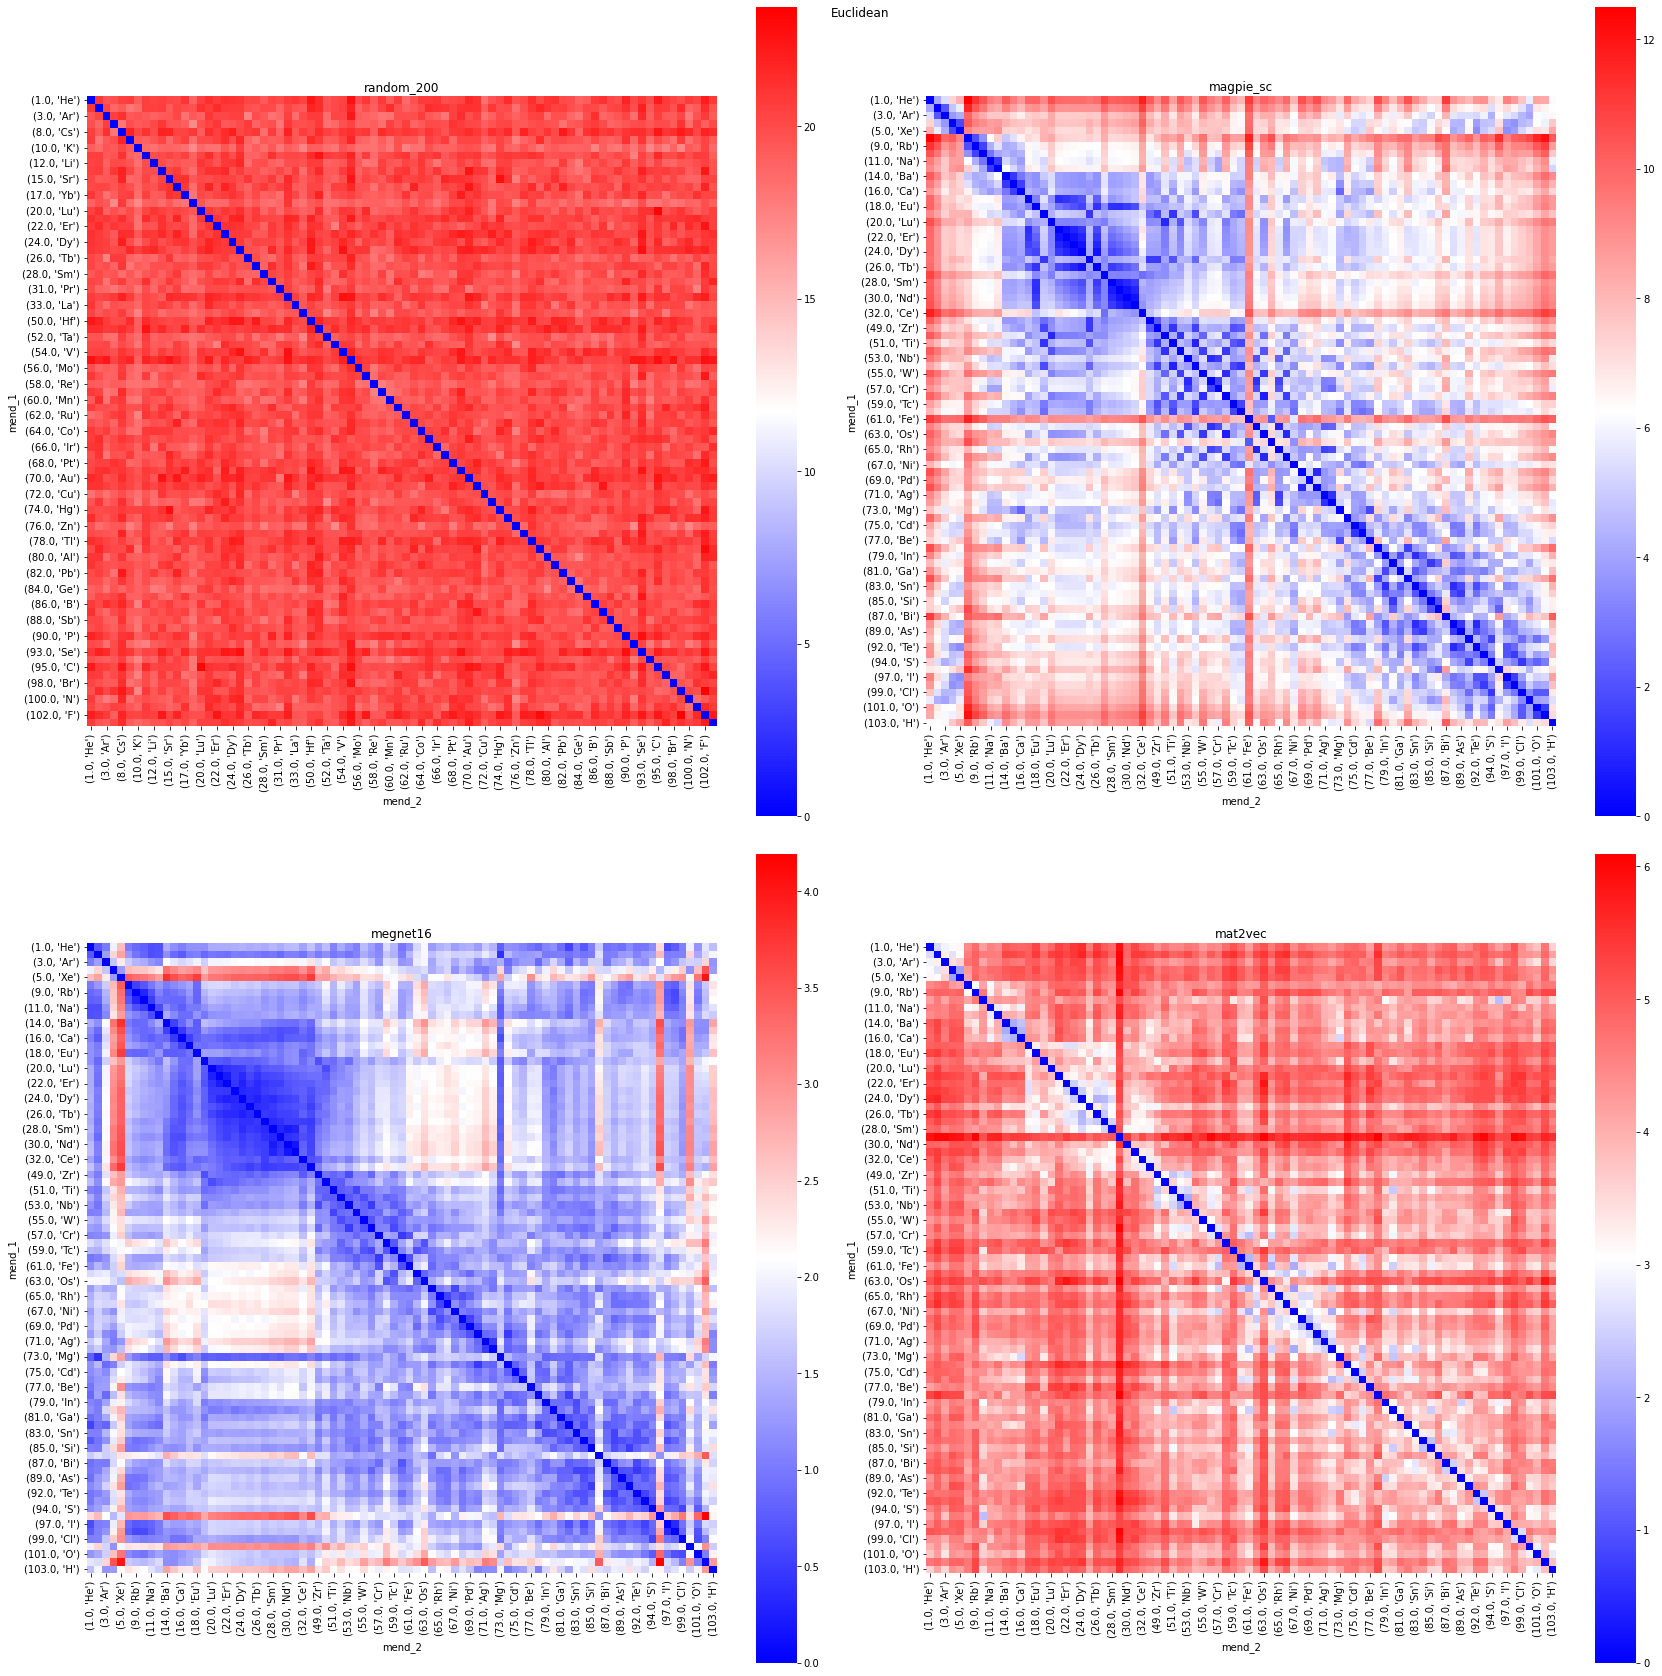

In [8]:
# Let's start generating the plots

# Plotting Euclidean correlations

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(24,24))
axes =[ax1,ax2,ax3,ax4]
fig.suptitle('Euclidean')
for i, cbfv in enumerate(cbfvs):

    p=AtomEmbeds[cbfv].create_distance_pivot_table(metric="euclidean")
    g=sns.heatmap(p, cmap = 'bwr', square='True', linecolor='k', ax=axes[i-1])
    axes[i-1].title.set_text(cbfv)




fig.tight_layout()
plt.show()


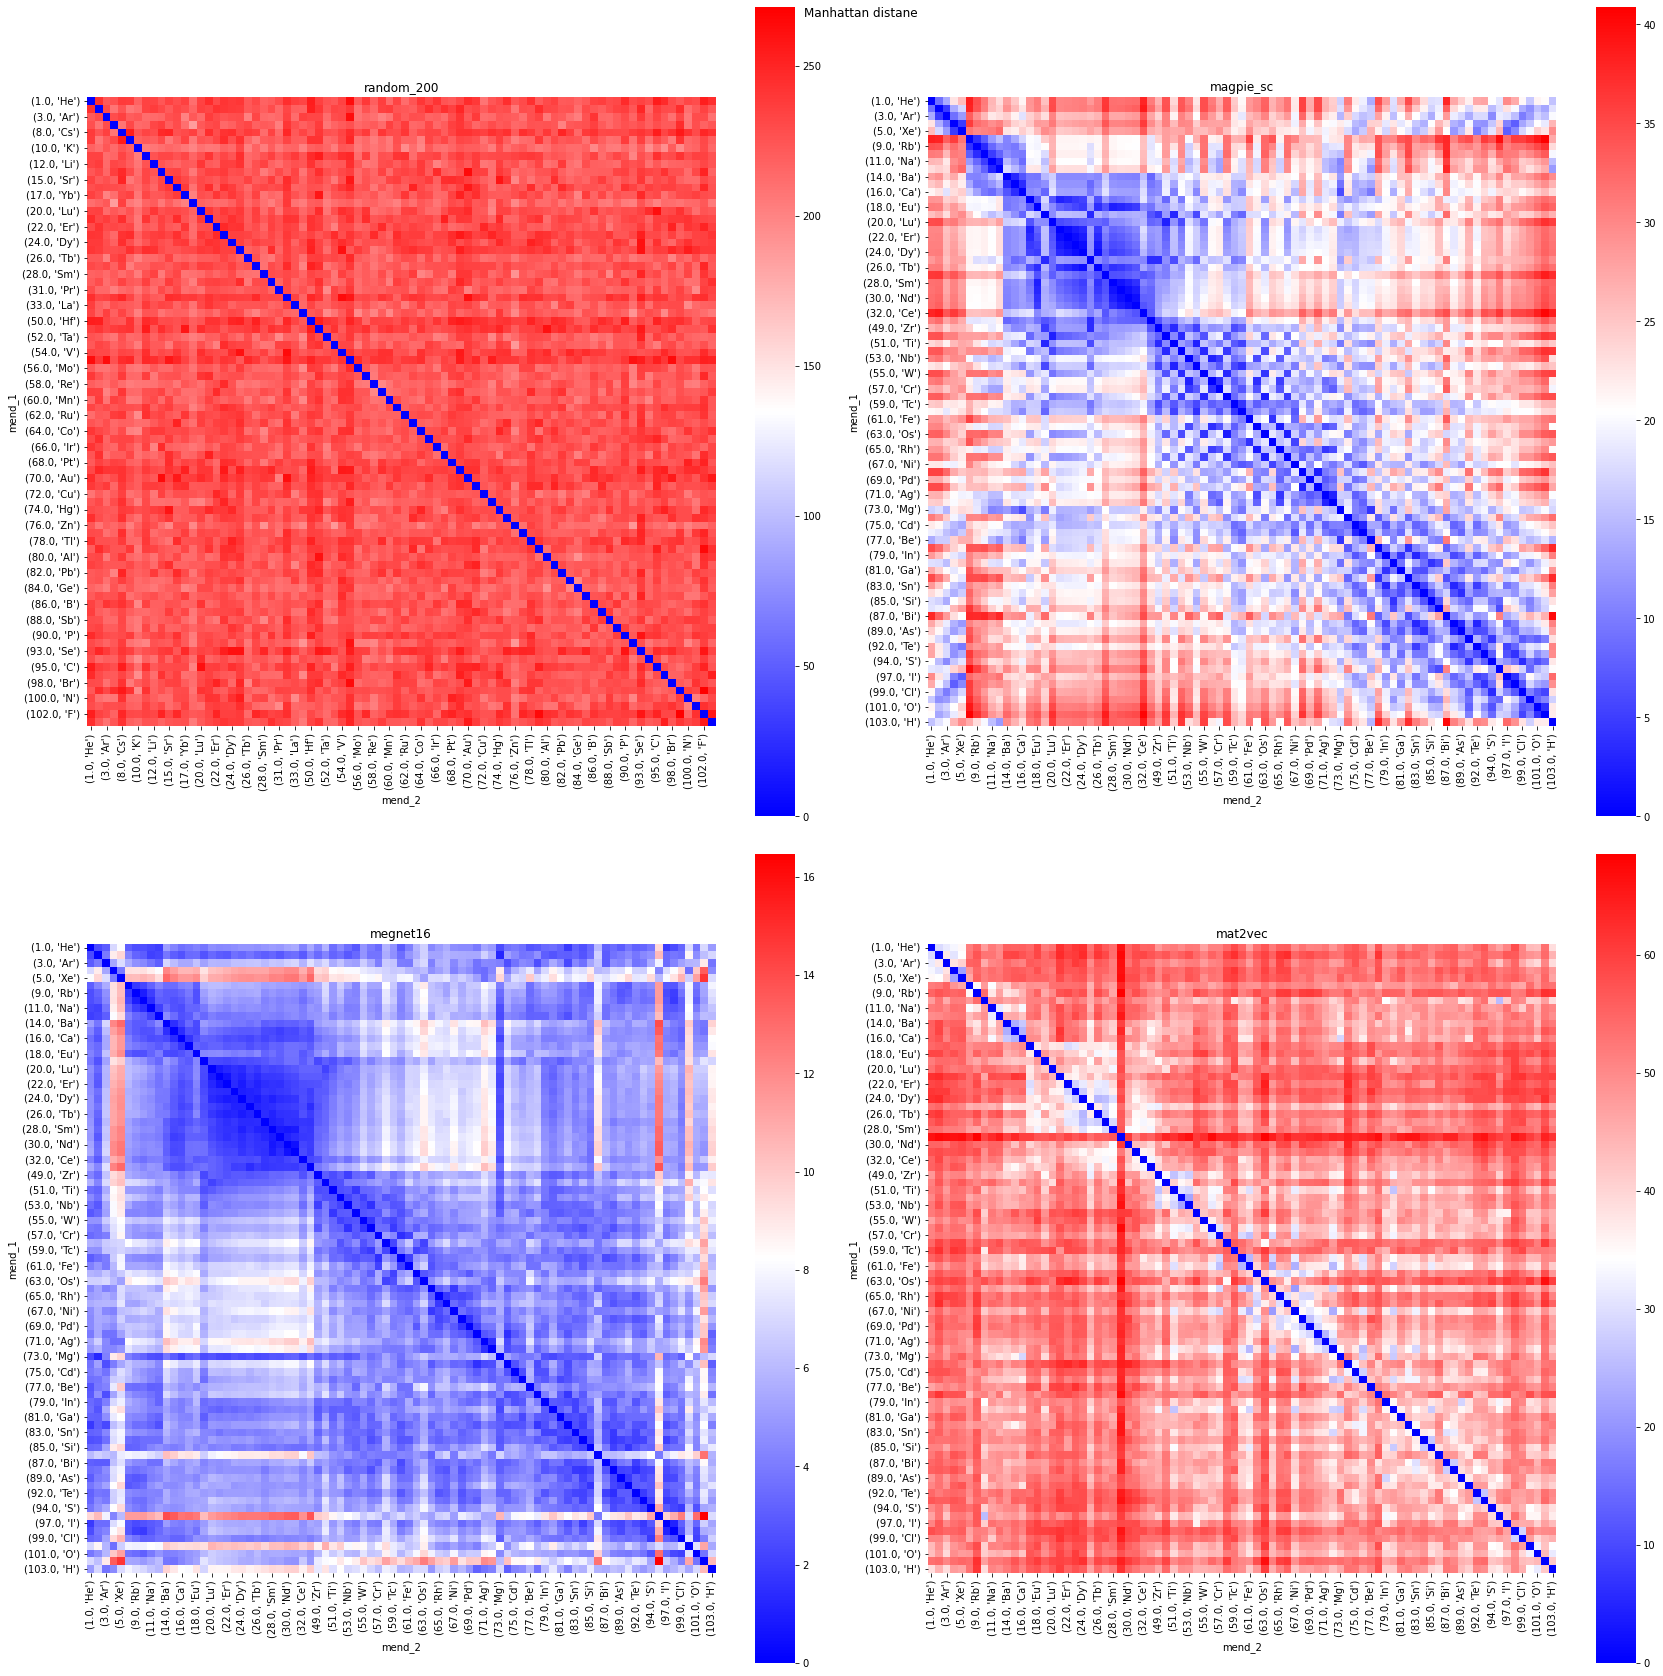

In [9]:
# Let's start generating the plots

# Plotting Manhattan correlations

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(24,24))
axes =[ax1,ax2,ax3,ax4]
fig.suptitle('Manhattan distane')
for i, cbfv in enumerate(cbfvs):

    p=AtomEmbeds[cbfv].create_distance_pivot_table(metric="manhattan")
    g=sns.heatmap(p, cmap = 'bwr', square='True', linecolor='k', ax=axes[i-1])
    axes[i-1].title.set_text(cbfv)




fig.tight_layout()
plt.show()


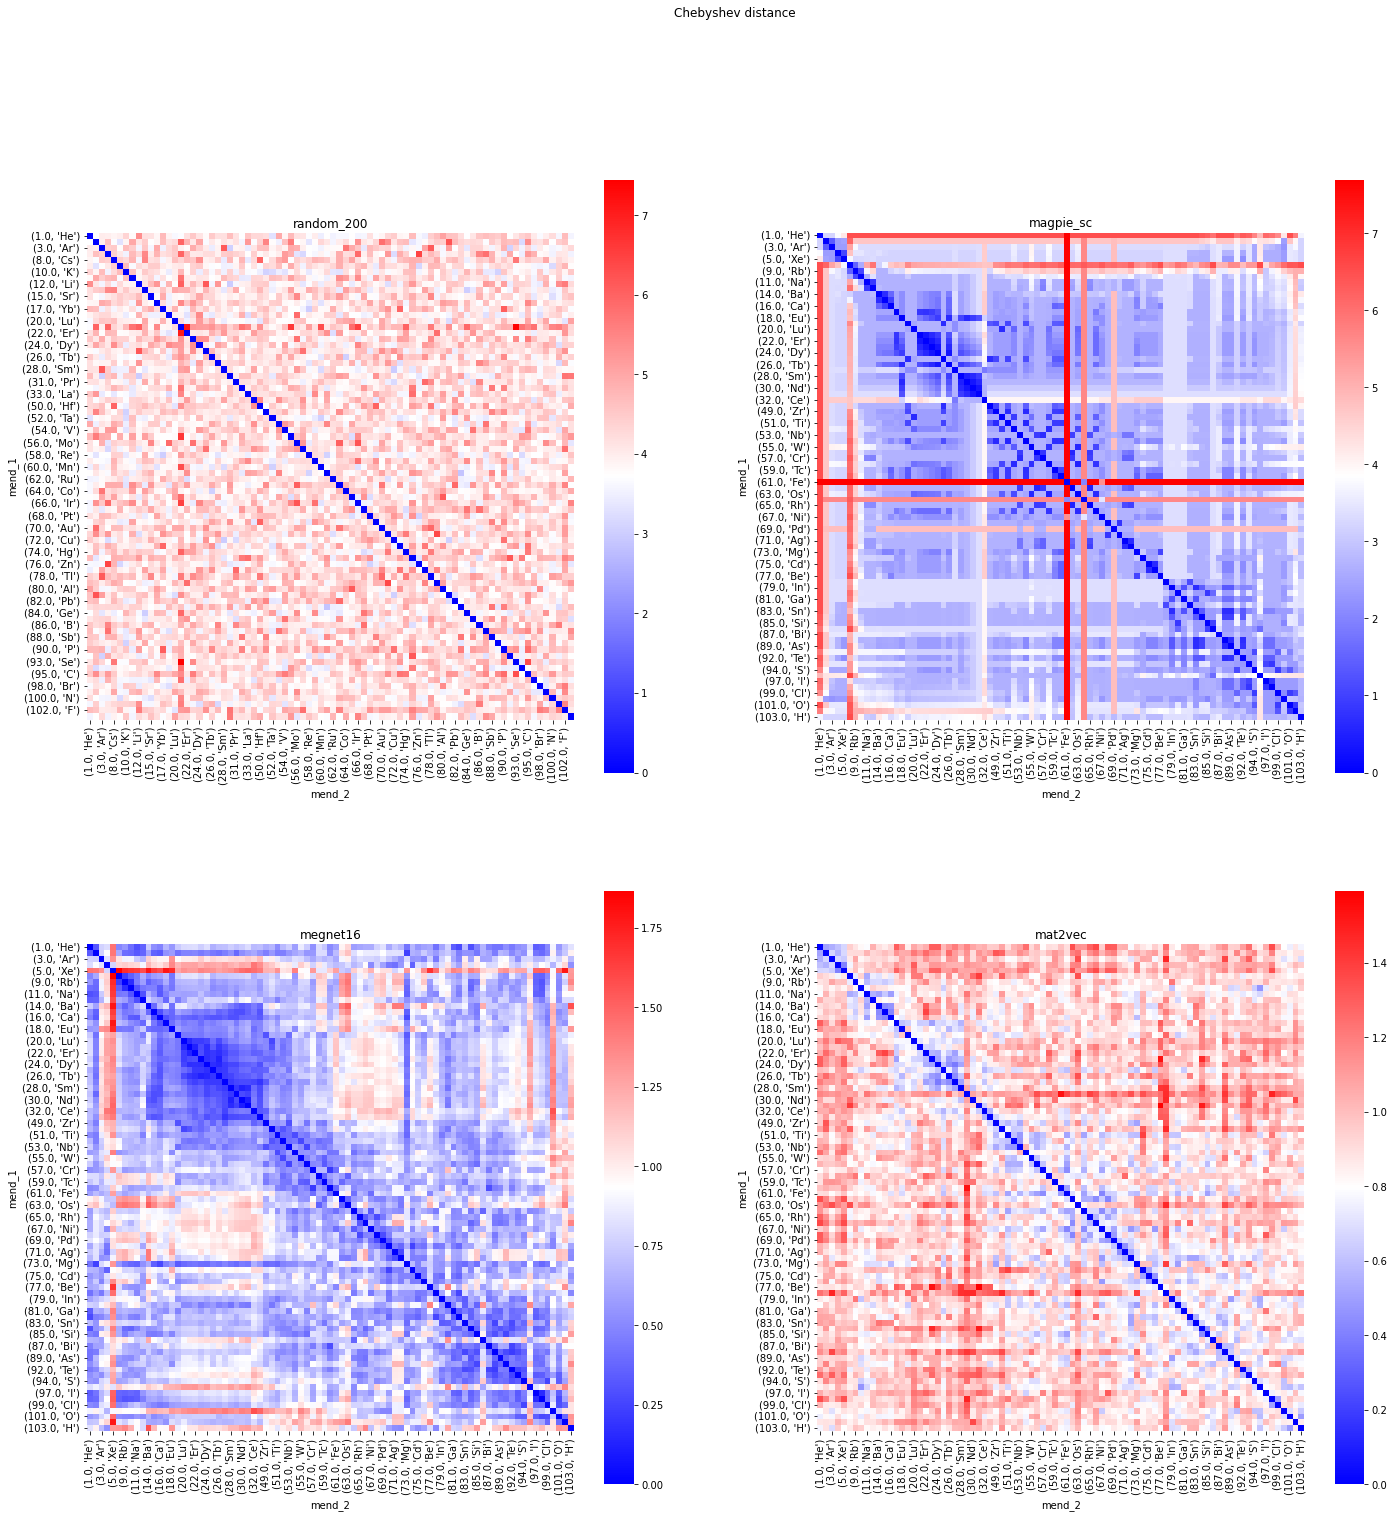

In [10]:
# Let's start generating the plots

# Plotting Chebyshev correlations

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(24,24))
axes =[ax1,ax2,ax3,ax4]
fig.suptitle('Chebyshev distance')
for i, cbfv in enumerate(cbfvs):

    p=AtomEmbeds[cbfv].create_distance_pivot_table(metric="chebyshev")
    g=sns.heatmap(p, cmap = 'bwr', square='True', linecolor='k', ax=axes[i-1])
    axes[i-1].title.set_text(cbfv)





plt.show()


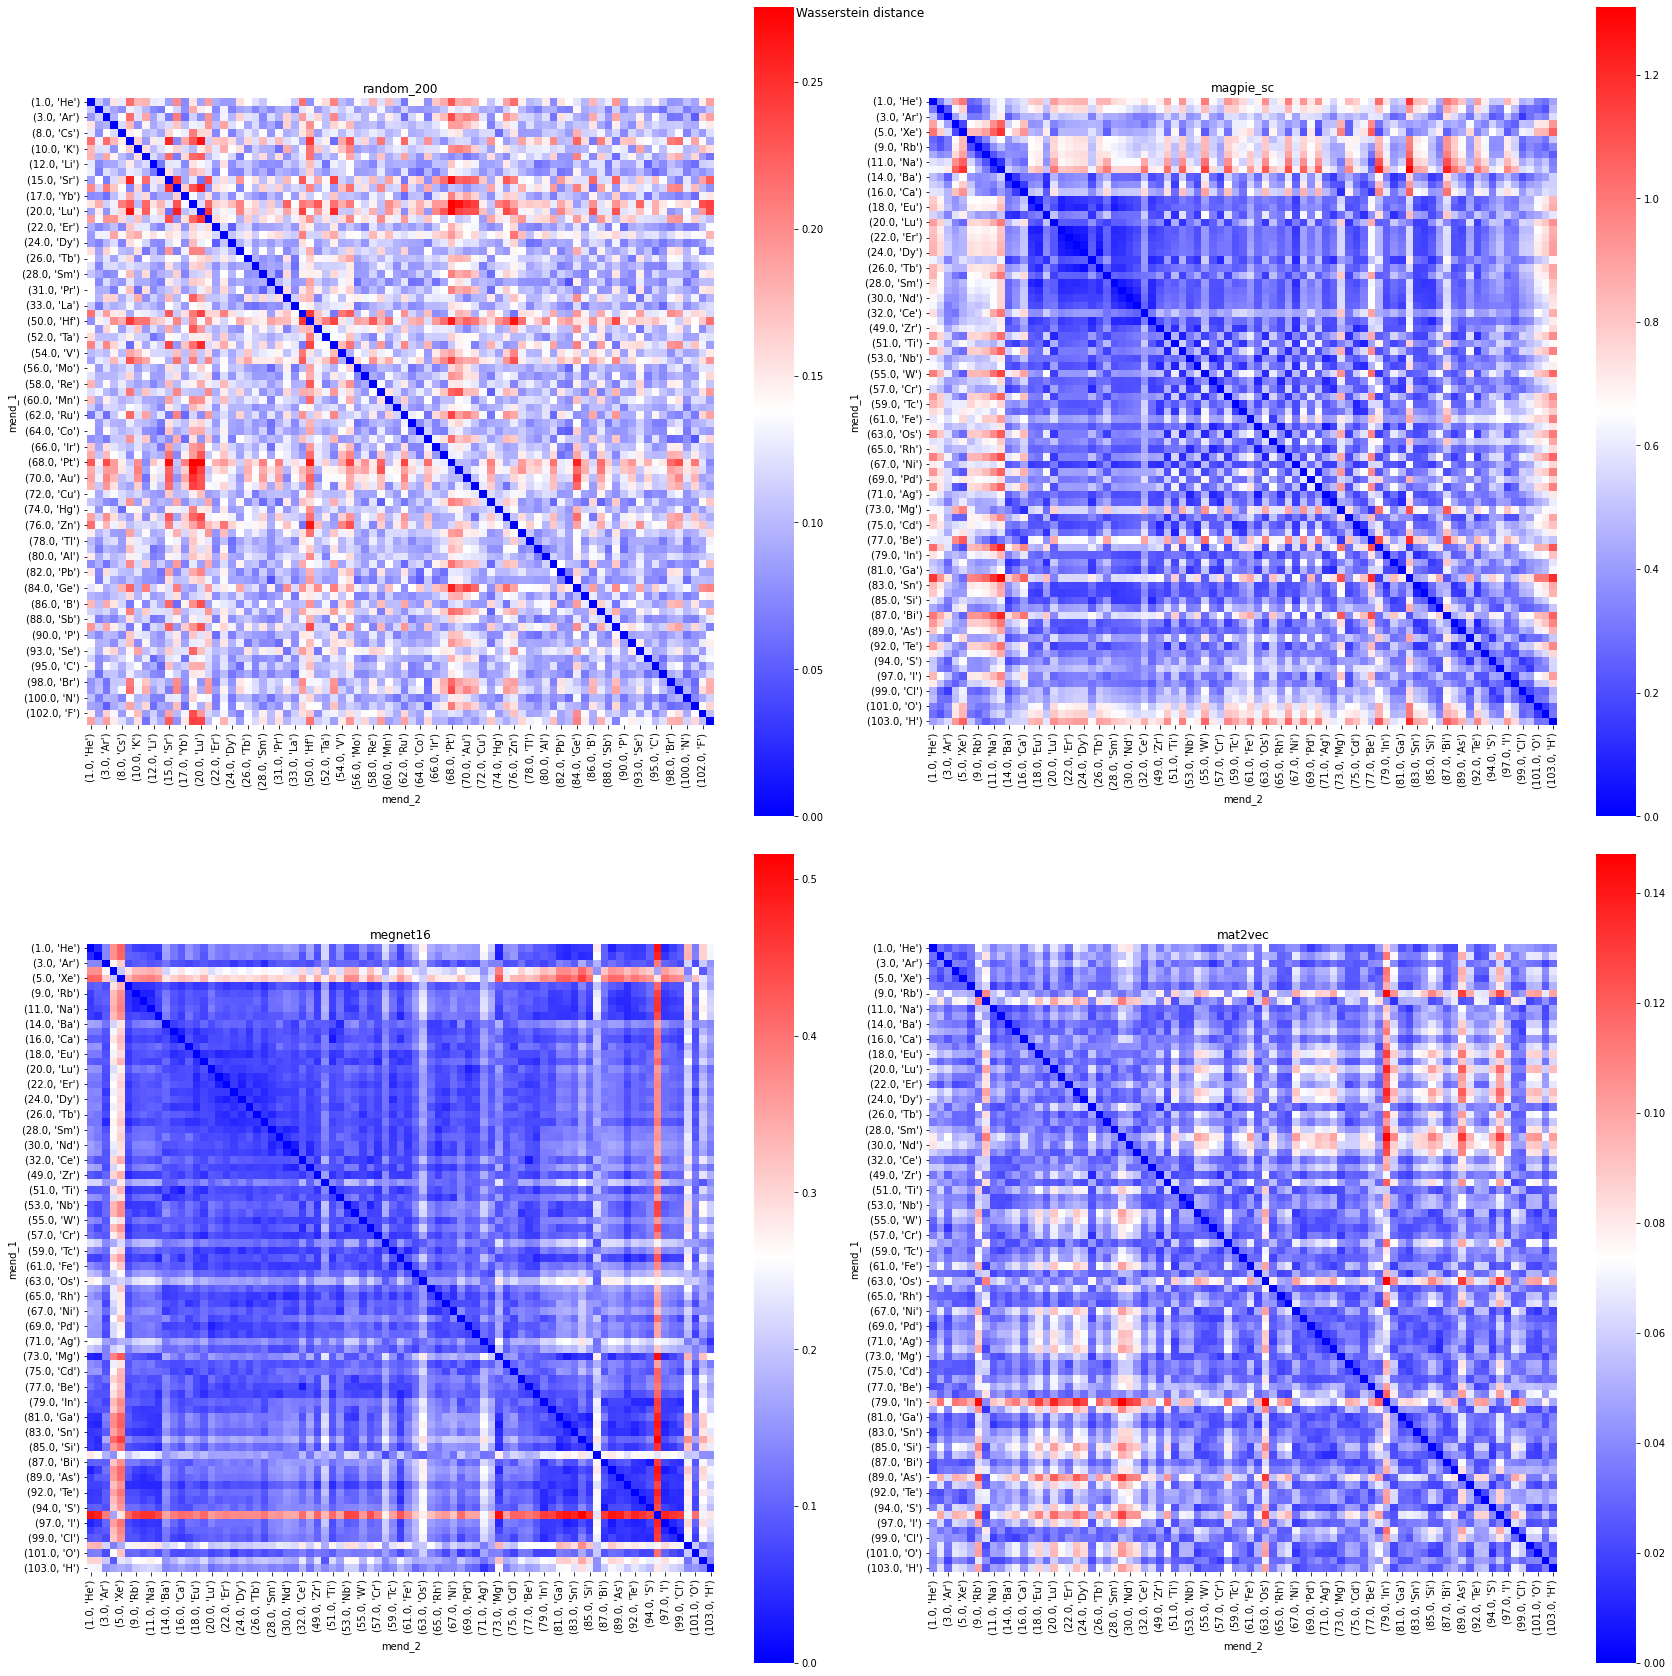

In [11]:
# Let's start generating the plots

# Plotting Wasserstein distances

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(24,24))
axes =[ax1,ax2,ax3,ax4]
fig.suptitle('Wasserstein distance')
for i, cbfv in enumerate(cbfvs):

    p=AtomEmbeds[cbfv].create_distance_pivot_table(metric="wasserstein")
    g=sns.heatmap(p, cmap = 'bwr', square='True', linecolor='k', ax=axes[i-1])
    axes[i-1].title.set_text(cbfv)




fig.tight_layout()
plt.show()


## Clustering analysis (Dimensionality reduction)

In this section we will show clustering analysis of the different chemical representations

TODO: Add a hue for the group of the elements to show better clustering

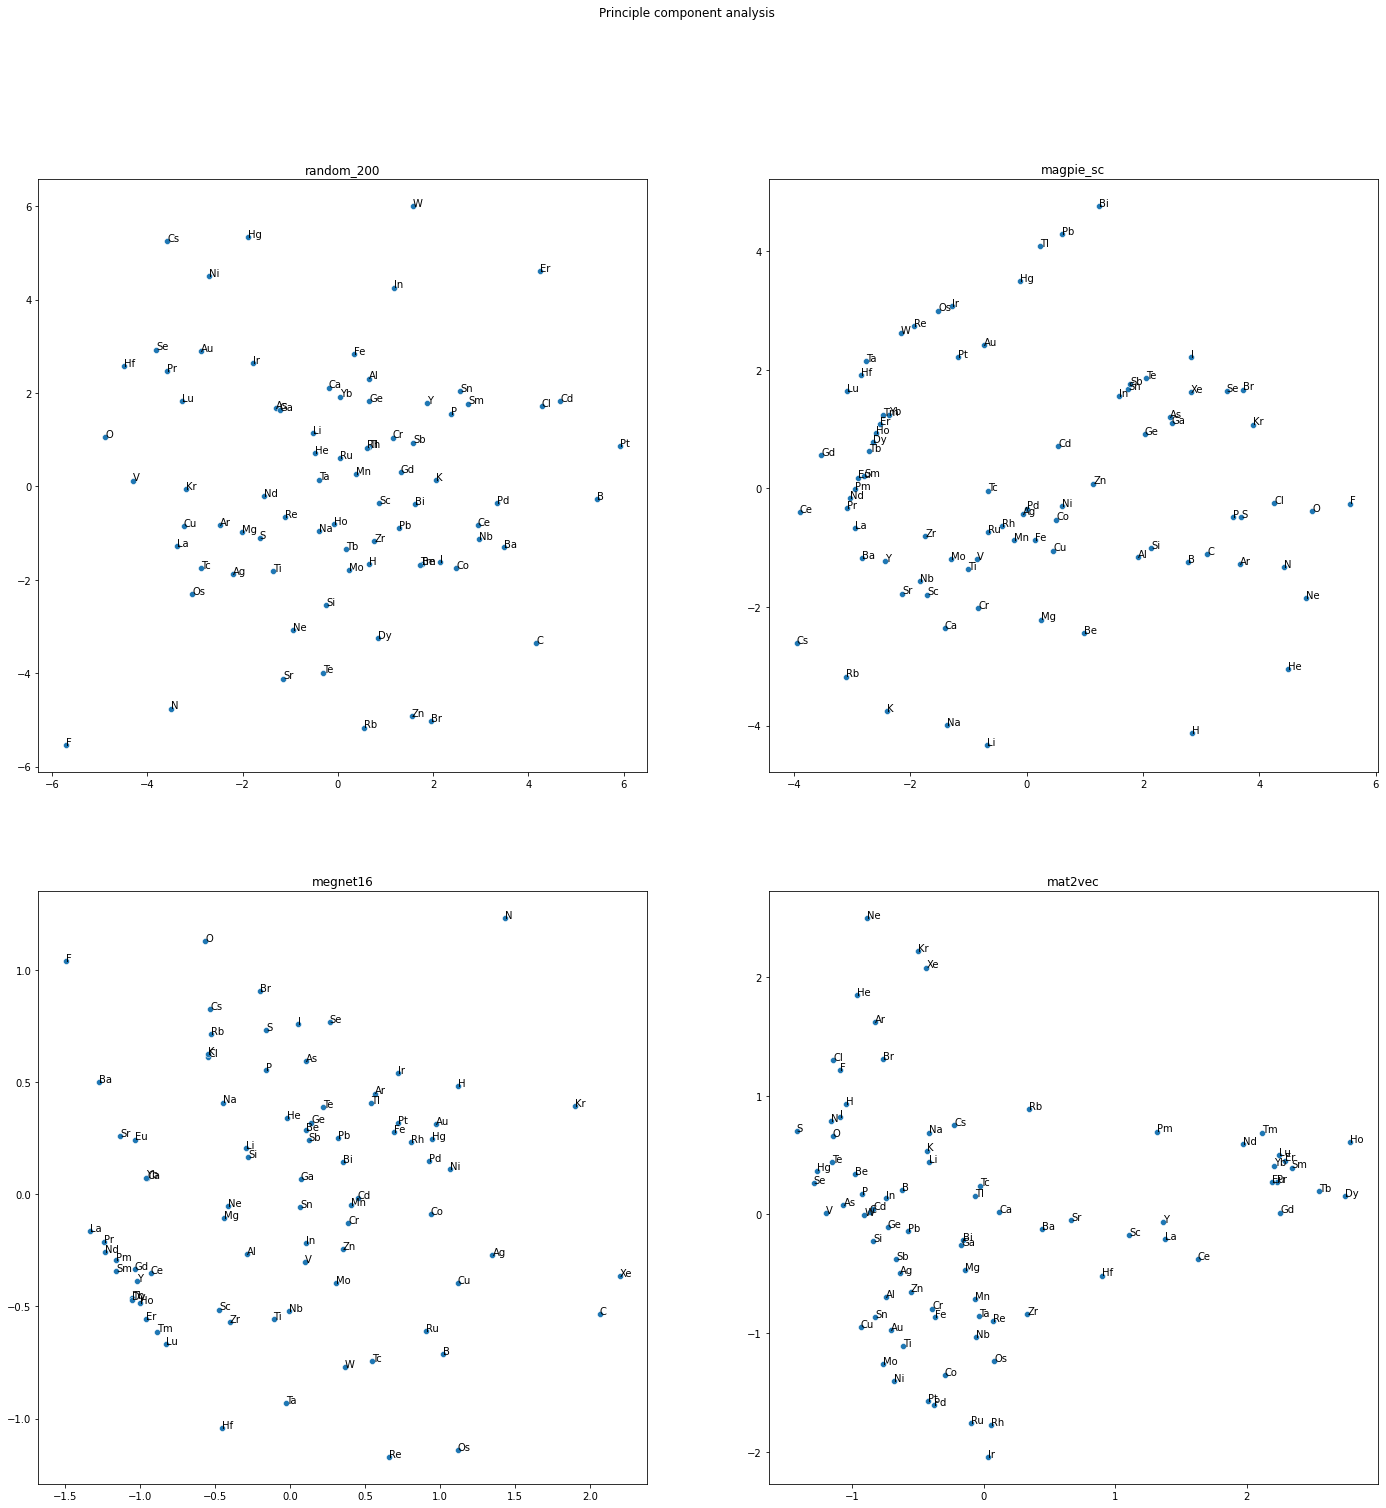

In [12]:
# Make the PCA plots

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(24,24))
axes =[ax1,ax2,ax3,ax4]
fig.suptitle('Principle component analysis')
for i, cbfv in enumerate(cbfvs):

    AtomicEmbed = AtomEmbeds[cbfv]
    
    # Create an array of the embedding vectors
    embeddings_array = np.array(list(AtomicEmbed.embeddings.values()))
    #Create an array of the elements
    element_array = np.array(AtomicEmbed.element_list)

    # Perform the PCA
    pca = decomposition.PCA(n_components=2) #project to 2 dimensions
    pca.fit(embeddings_array)
    X = pca.transform(embeddings_array)

    pca_dim1= X[:,0]
    pca_dim2 =X[:,1]

    g=sns.scatterplot(x=pca_dim1, y=pca_dim2, ax=axes[i-1])
    for idx in range(len(X)):
        axes[i-1].text(x=pca_dim1[idx], y=pca_dim2[idx], s = element_array[idx])
    
    # Title the plots
    axes[i-1].title.set_text(cbfv)



plt.show()

        

    

